In [11]:
library(Seurat)
library(harmony)
library(Signac)
library(dplyr)
library(patchwork)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(cowplot)
library(GenomicRanges)
library(future)
library(dplyr)
library(DoubletFinder)
library("stringr") 
library('Repitools')
library(BSgenome.Hsapiens.UCSC.hg38)
library(caret)
library(PathoStat)
library(edgeR)
library(EnhancedVolcano)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: Rcpp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, in

# merge

In [5]:
obj.big <- merge(Retina, y = Macula, add.cell.ids = c("Retina", "Macula"), project = "eye")



Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows



In [6]:
obj.big

An object of class Seurat 
247962 features across 34230 samples within 3 assays 
Active assay: SCT (28094 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, ATAC

# normalize

In [10]:
obj.big <- SCTransform(obj.big)


Running SCTransform on assay: RNA

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 29174 by 34230

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 420 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 29174 genes

Computing corrected count matrix for 29174 genes

Calculating gene attributes

Wall clock passed: Time difference of 2.233726 mins

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Warning message:
"Different cells and/or features from existing assay SCT"
Set default assay to SCT



In [13]:
obj.big <- RunPCA(obj.big, verbose = FALSE)


Warning message:
"Number of dimensions changing from 20 to 25"


In [15]:
obj.big <- RunUMAP(obj.big, reduction = "pca")


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
04:21:18 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

04:21:18 Read 34230 rows and found 25 numeric columns

04:21:18 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by 'BiocGenerics'

04:21:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

04:21:21 Writing NN index file to 

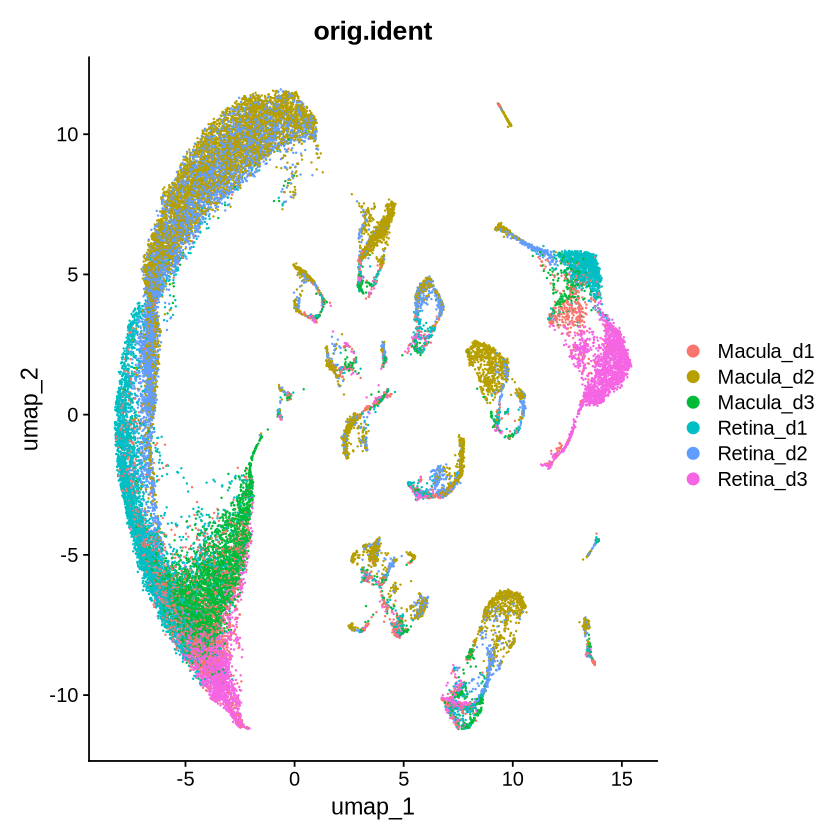

In [17]:
DimPlot(obj.big, group.by = c("orig.ident"), ncol = 1,reduction = "umap",shuffle = TRUE)


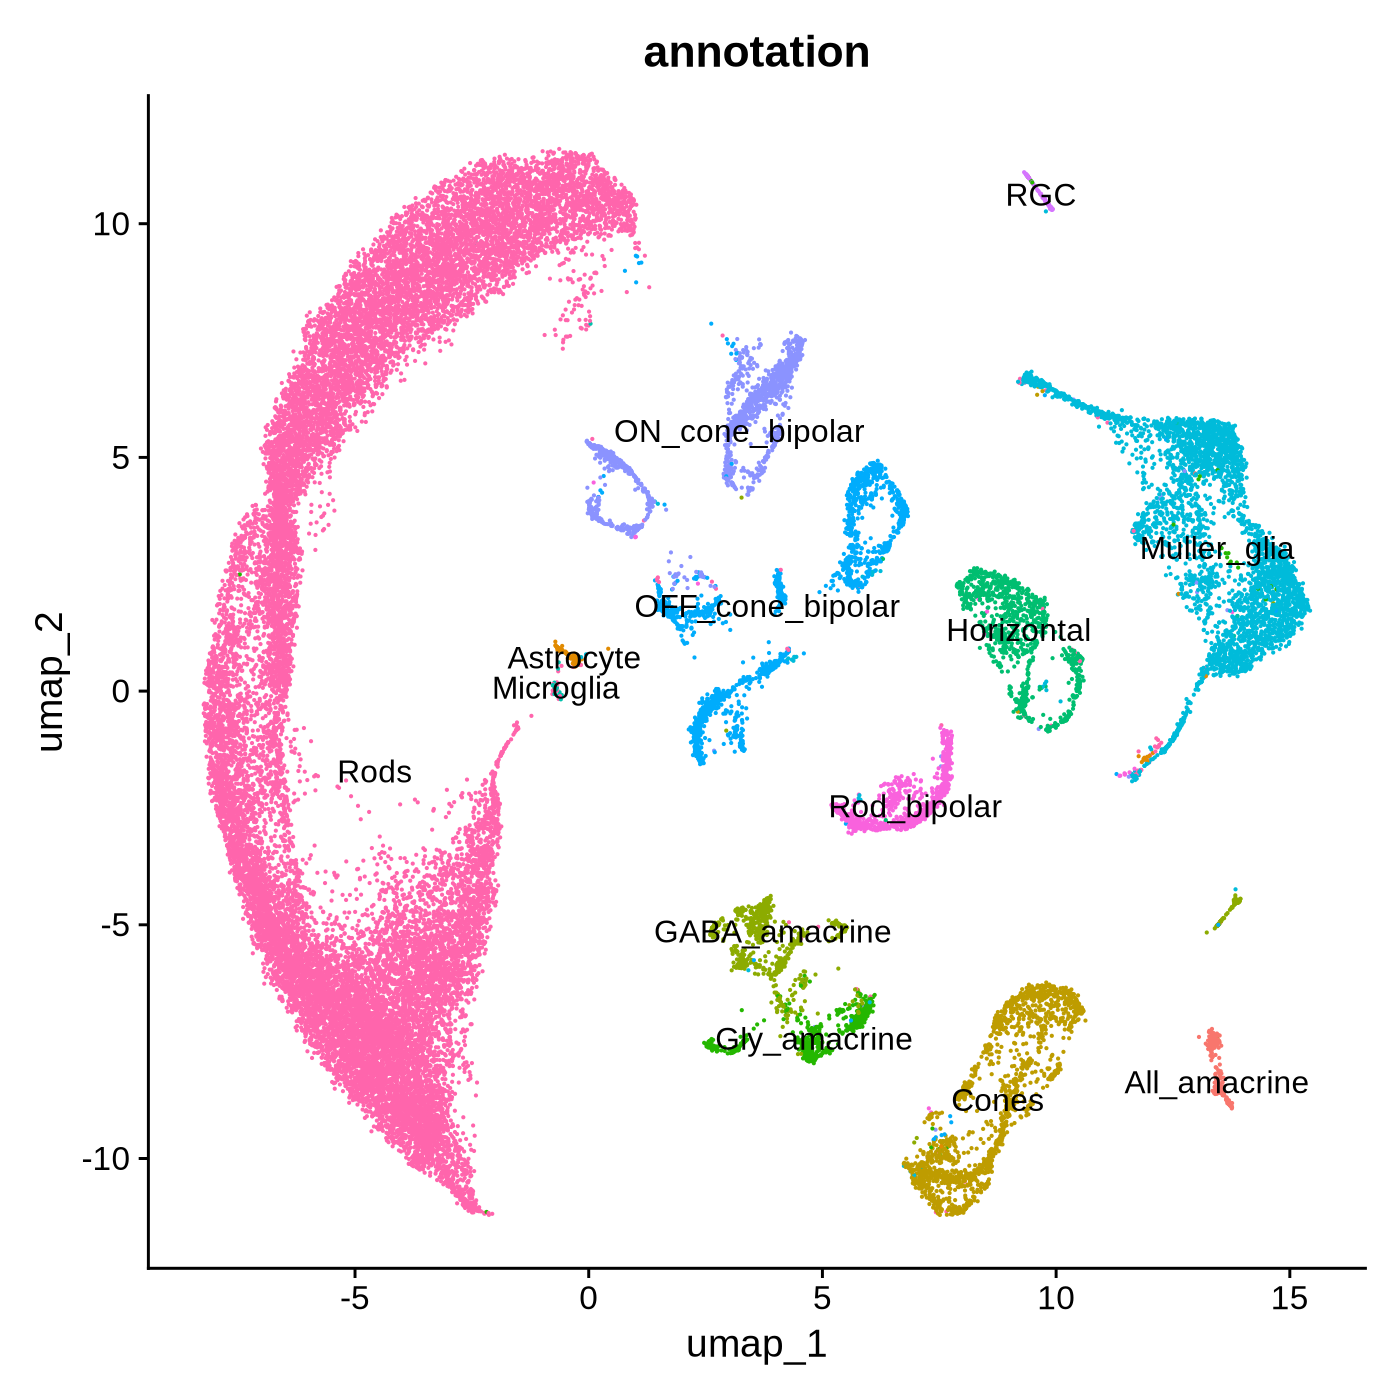

In [404]:
DimPlot(obj.big, group.by = c("annotation"), ncol = 1,reduction = "umap",label = TRUE, shuffle = TRUE) + NoLegend()


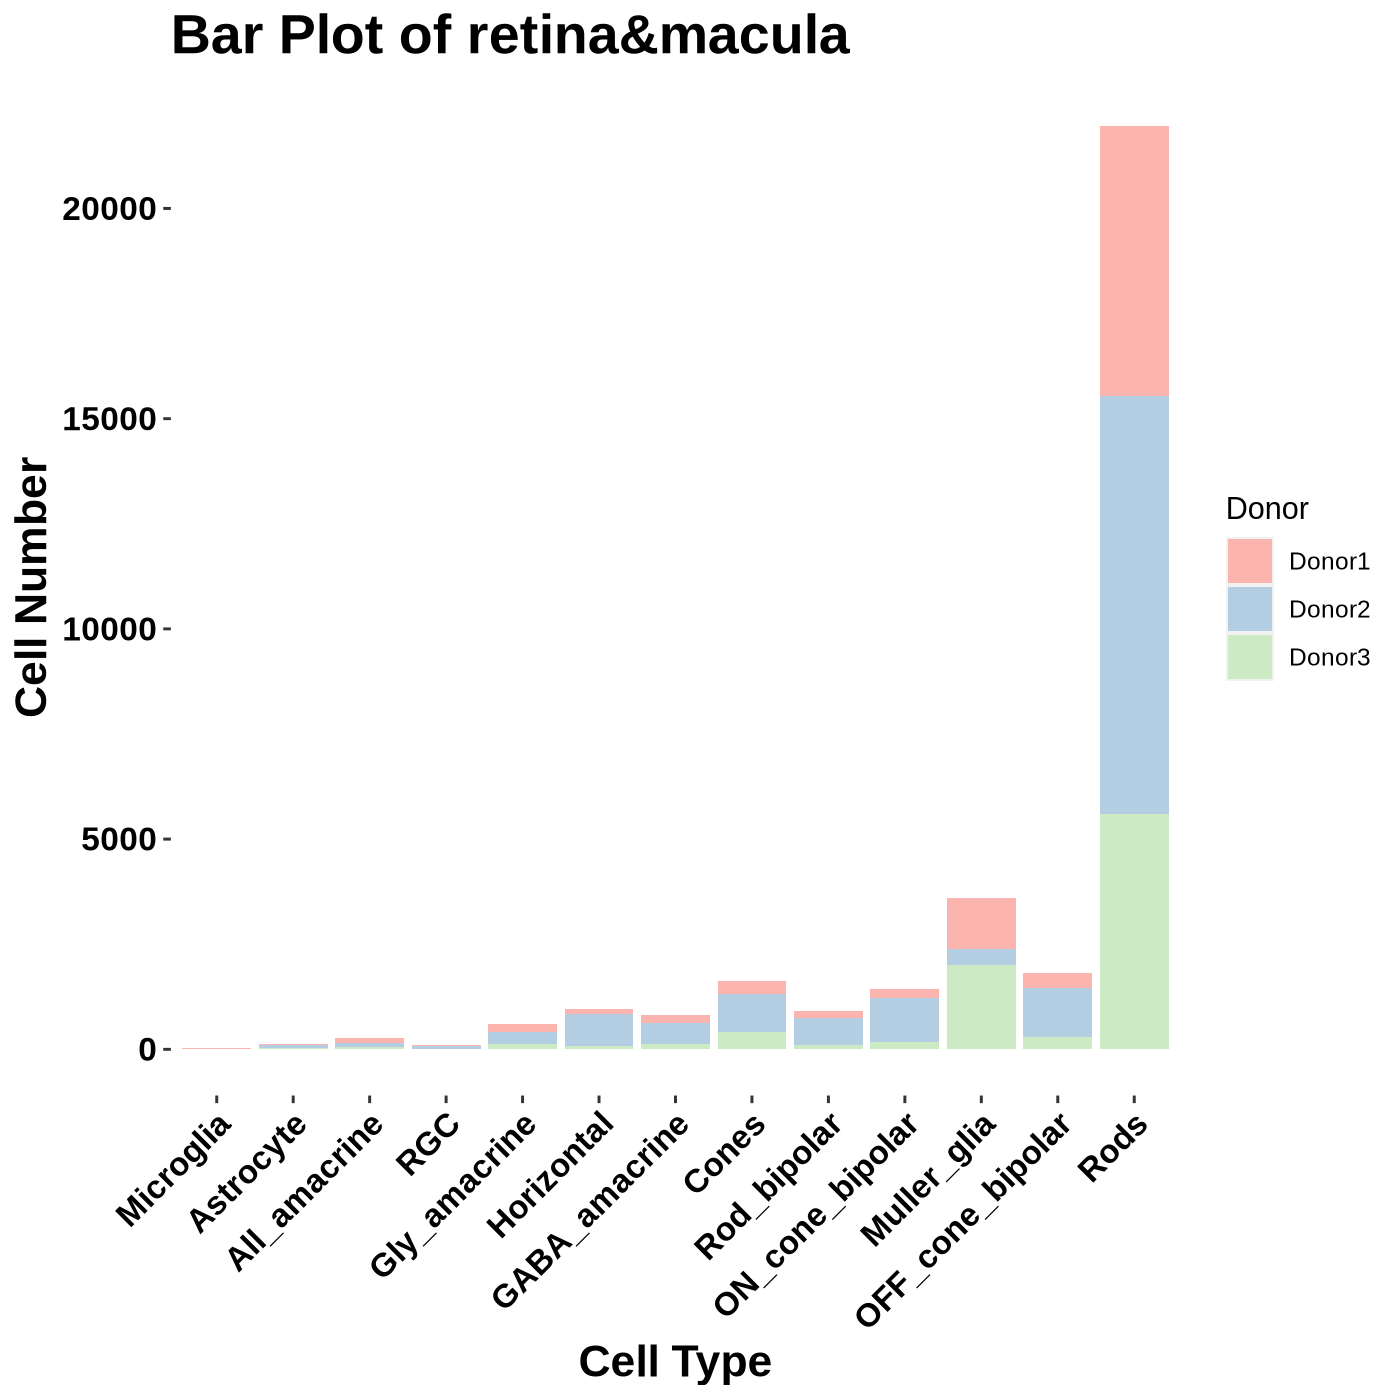

In [148]:
library(ggplot2)
library(tidyr)

data_long$Category <- factor(data_long$Category, levels = Category)

p <- ggplot(data_long, aes(fill = Donor, y = Value, x = Category)) + 
  geom_bar(position = "stack", stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1,size=12,face="bold",color="black"),axis.text.y = element_text(hjust = 1,size=12,face="bold",color="black")) +
  labs(y = "Cell Number", x = "Cell Type", title = "Bar Plot of retina&macula") + 
    theme(
    plot.title = element_text(size = 20, face = "bold"), 
    axis.title.x = element_text(size = 16, face = "bold"), 
    axis.title.y = element_text(size = 16, face = "bold"),  
    panel.grid.major = element_blank(),  
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),  
    plot.background = element_blank(),   
  ) + 
  scale_fill_brewer(palette = "Pastel1") 

print(p)

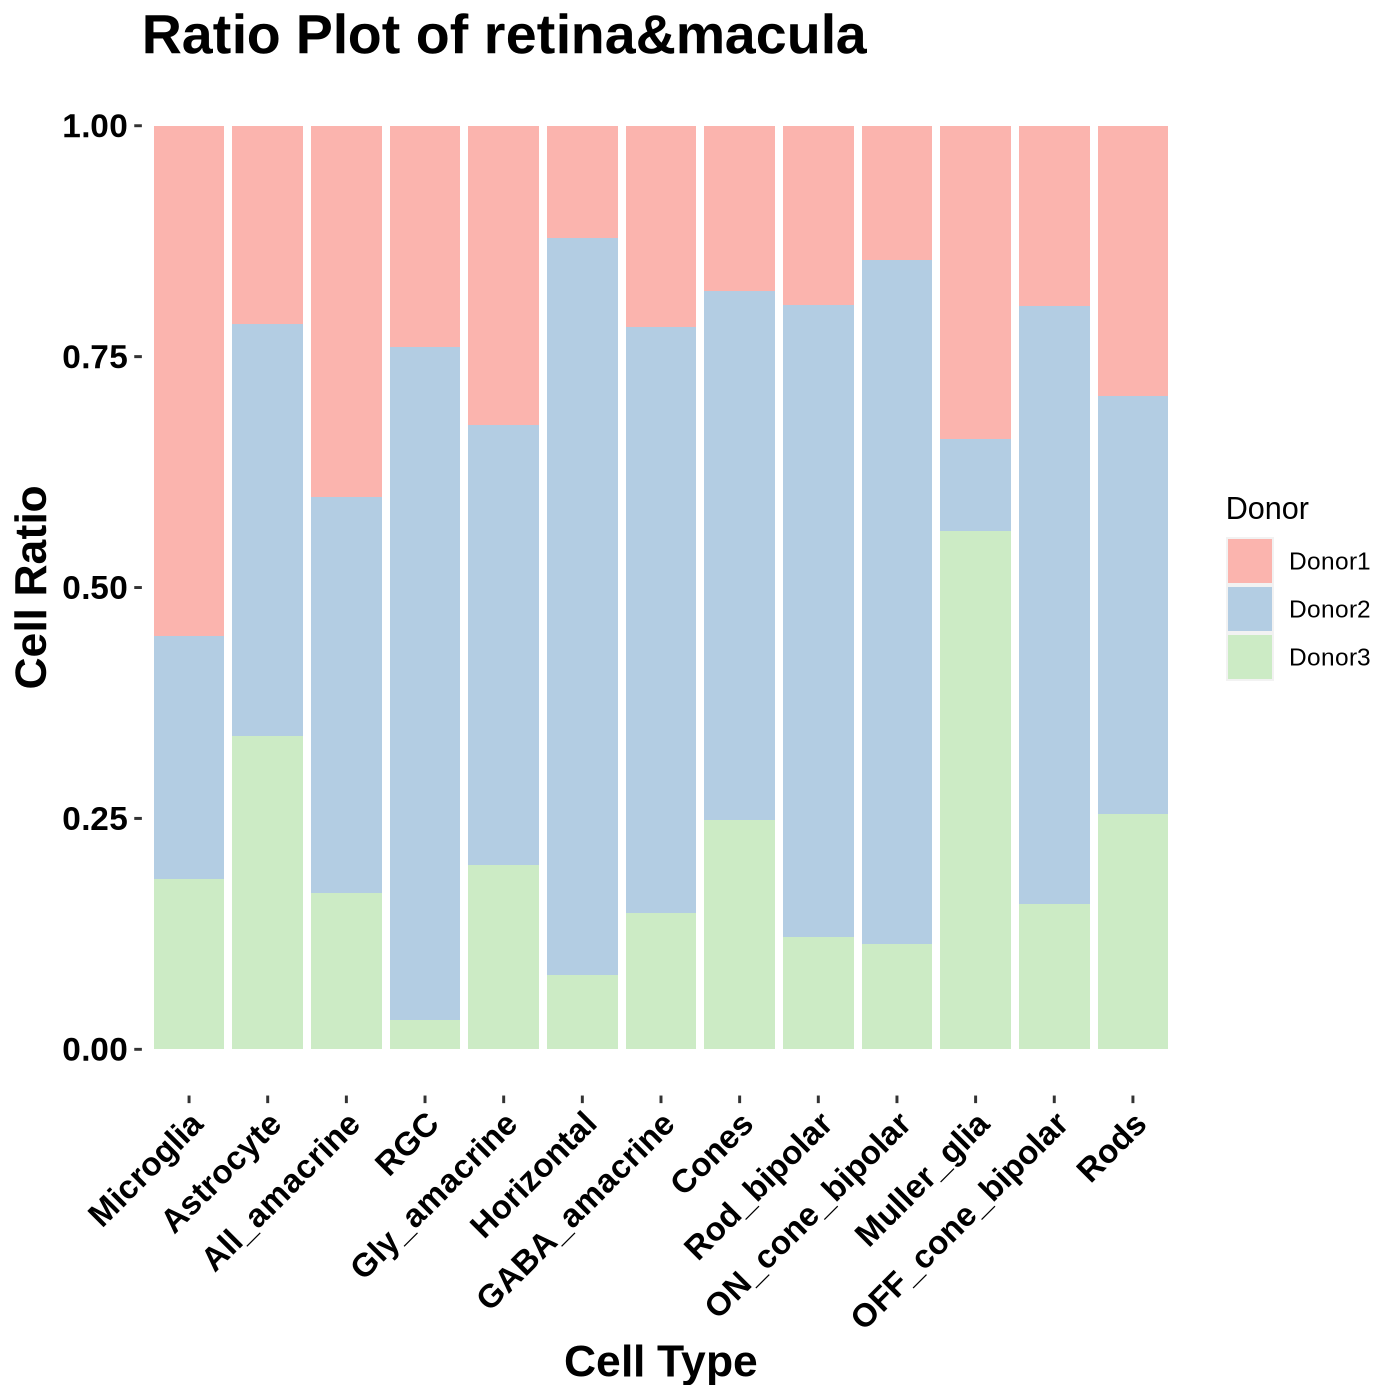

In [152]:
data_long$Category <- factor(data_long$Category, levels = Category)

p <- ggplot(data_long, aes(fill = Donor, y = Value, x = Category)) + 
  geom_bar(position = "stack", stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1,size=12,face="bold",color="black"),axis.text.y = element_text(hjust = 1,size=12,face="bold",color="black")) +
  labs(y = "Cell Ratio", x = "Cell Type", title = "Ratio Plot of retina&macula") + 
    theme(
    plot.title = element_text(size = 20, face = "bold"), 
    axis.title.x = element_text(size = 16, face = "bold"), 
    axis.title.y = element_text(size = 16, face = "bold"),  
    panel.grid.major = element_blank(),  
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),  
    plot.background = element_blank(),   
  ) + 
  scale_fill_brewer(palette = "Pastel1") 

print(p)

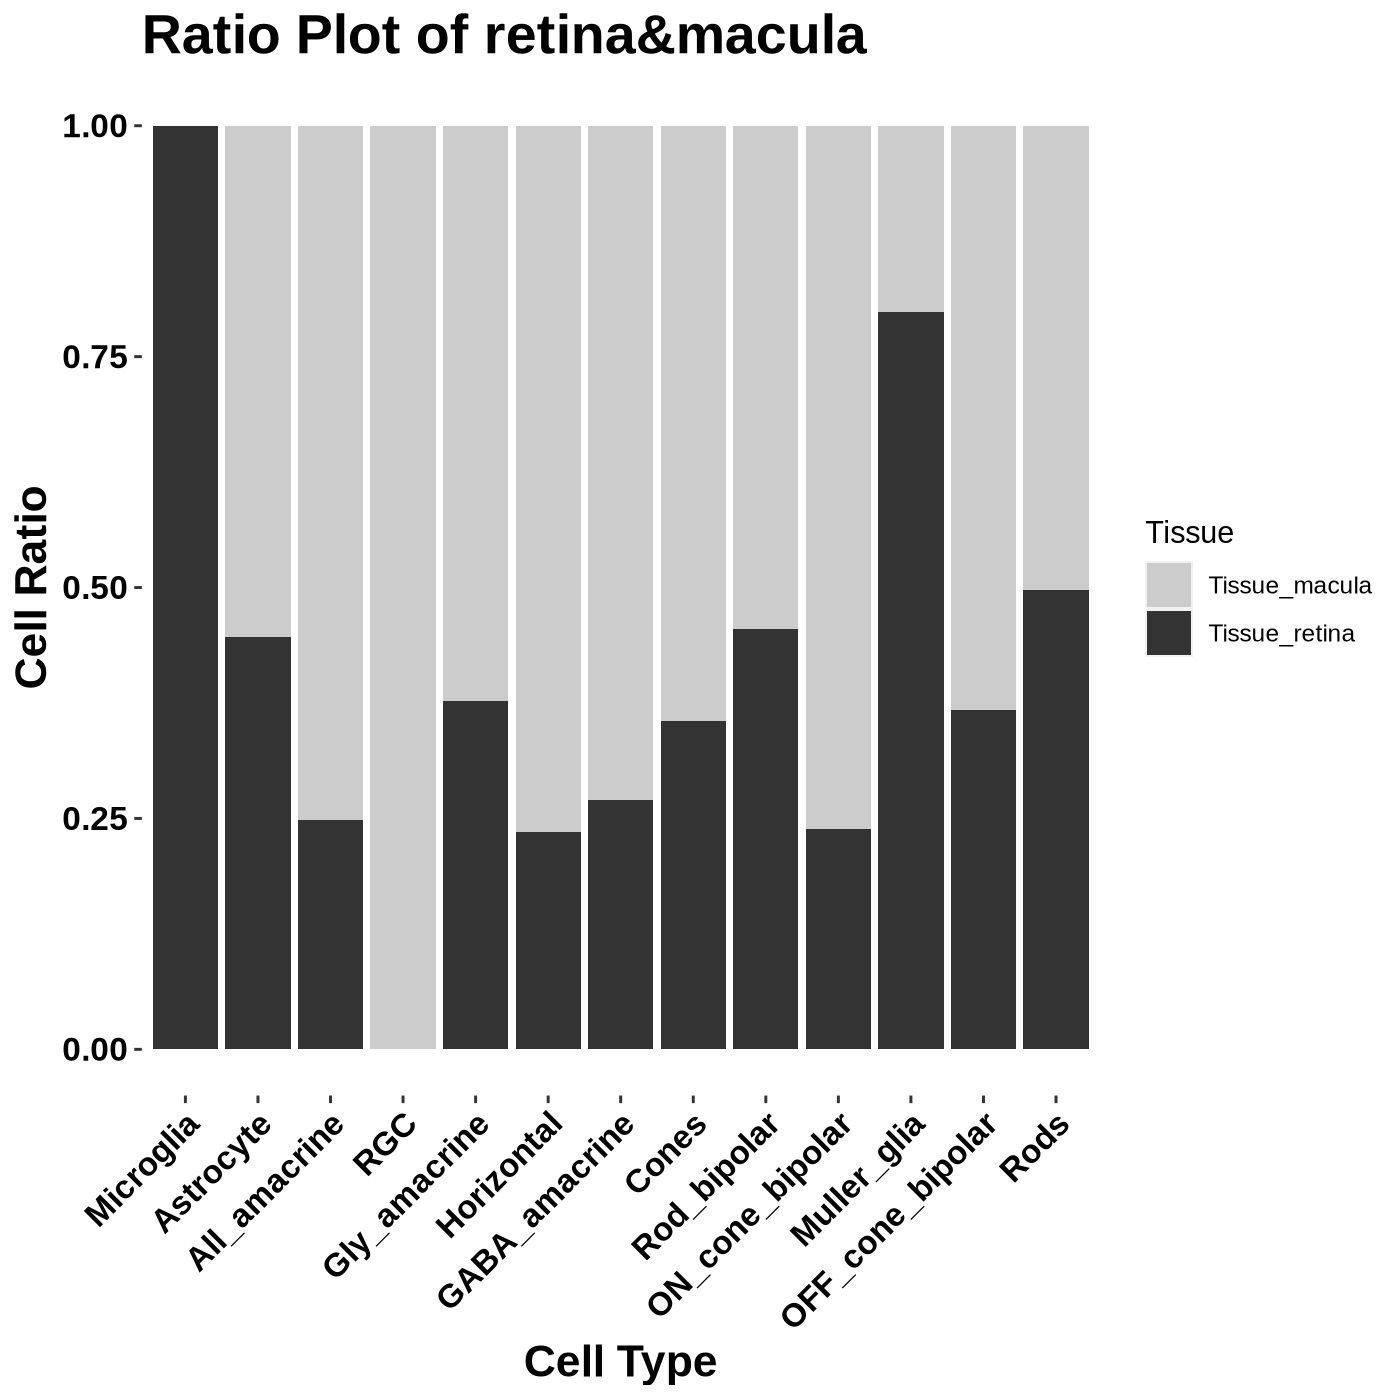

In [178]:

p <- ggplot(data_long, aes(fill = Tissue, y = Value, x = Category)) + 
  geom_bar(position = "stack", stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1,size=12,face="bold",color="black"),axis.text.y = element_text(hjust = 1,size=12,face="bold",color="black")) +
  labs(y = "Cell Ratio", x = "Cell Type", title = "Ratio Plot of retina&macula") + 
    theme(
    plot.title = element_text(size = 20, face = "bold"), 
    axis.title.x = element_text(size = 16, face = "bold"), 
    axis.title.y = element_text(size = 16, face = "bold"),  
    panel.grid.major = element_blank(),  
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),  
    plot.background = element_blank(),   
  ) + scale_fill_grey(start = 0.8, end = 0.2)
  
print(p)